In [1]:
import networkx as nx
import numpy as np
import itertools as it
import matplotlib.pyplot as plt

# EXERCISE 3
(i) Write a function max_degree that takes a graph as its argument, and returns the name and degree of the node with highest degree. (3 pts)

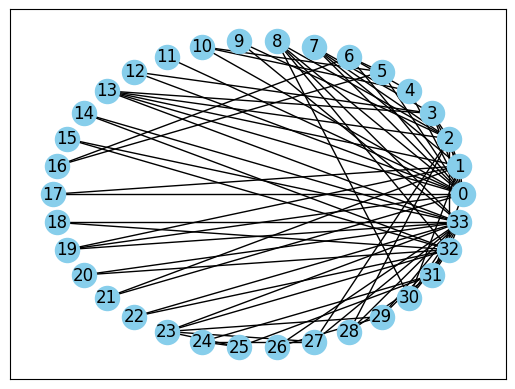

In [6]:
K = nx.karate_club_graph()
pos = nx.circular_layout(K)
nx.draw_networkx(K, pos=pos, with_labels=True, node_color='skyblue')

In [7]:
K.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [8]:
def max_degree(K):
    degree_list = []
    for node in K.nodes():
        degree_list.append(K.degree(node))
    degree_list = np.array(degree_list)
    print(np.argmax(degree_list), degree_list[np.argmax(degree_list)])

In [9]:
max_degree(K)

33 17


(ii) Write a function mutual_friends that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph SG drawn above,

mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in SG drawn above. (4 pts)

Why not try this intersection function? (from : https://www.geeksforgeeks.org/python-intersection-two-lists/)

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

def intersection(lst1, lst2):
return list(set(lst1) & set(lst2))

def Intersection(lst1, lst2):
    return set(lst1).intersection(lst2)

In [10]:
def mutual_friends(G, node1, node2):
    node1_neighbors = list(G.neighbors(node1))
    node2_neighbors = list(G.neighbors(node2))
    return [val for val in node1_neighbors if val in node2_neighbors]

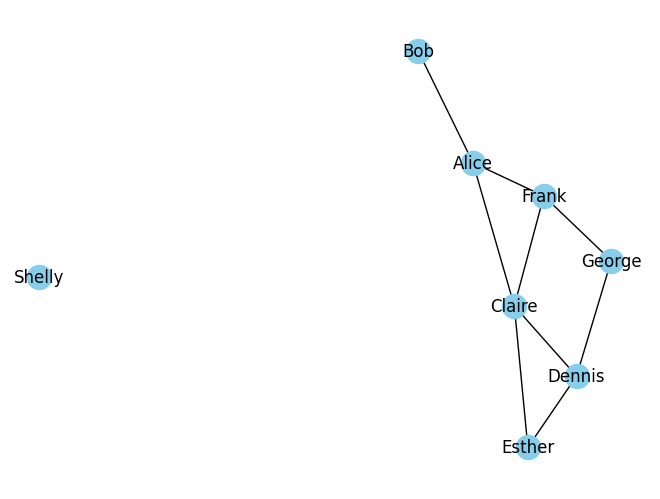

In [11]:
SG = nx.read_adjlist('data/friends.adjlist')
nx.draw(SG, with_labels=True, node_color='skyblue')

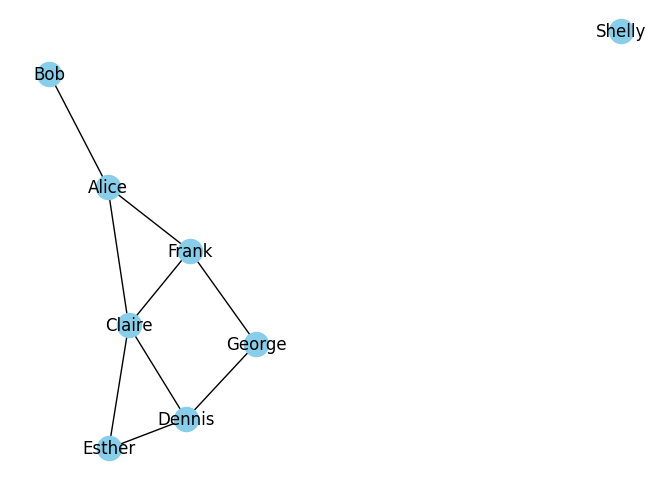

In [12]:
nx.draw(SG, with_labels=True, node_color='skyblue')

In [13]:
print(list(SG.neighbors('Frank')))
print(list(SG.neighbors('Alice')))
mutual_friends(SG, 'Frank', 'Alice')

['George', 'Claire', 'Alice']
['Claire', 'Bob', 'Frank']


['Claire']

iii) Take the Karate network as an input and find at least one pair of nodes that have mutual friends and one pair without. (2 pts)

In [14]:
# idea : sample two node at random and check whether they have a mutual friend with the pre-defined function
from random import sample

# find a pair of nodes having mutual friends
while True:
    pair = sample(list(K.nodes()),2)
    print(pair)
    mutual_friend_list = mutual_friends(K, pair[0], pair[1])
    if mutual_friend_list==[]:
        break
    else: 
        print(mutual_friend_list)

[18, 15]
[32, 33]
[15, 9]
[33]
[5, 23]


# degree and degree distribution

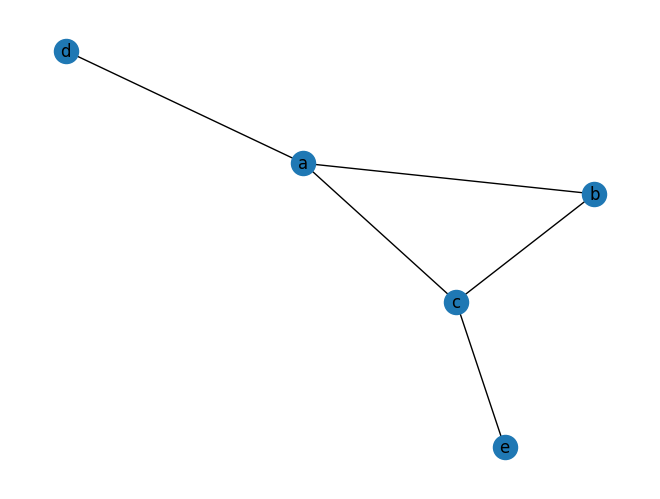

In [15]:
G = nx.Graph()
G.add_nodes_from(['a','b','c','d','e'])
G.add_edges_from([('a','b'),('b','c'),('a','c'),('a','d'),('c','e')])
nx.draw(G, with_labels=True)

In [16]:
# as a method:
print(dict(G.degree()))

# as a function
print(dict(nx.degree(G)))

# sorting the nodes according to their degree:
print(sorted(dict(G.degree()).items()))

# There are multiple ways to sort a dictionary by values. One is by the so called anonymous lambda function:
# reverse = True makes sure that it starts with the highest value
print(sorted(dict(G.degree()).items(),key = lambda x: x[1], reverse = True))

{'a': 3, 'b': 2, 'c': 3, 'd': 1, 'e': 1}
{'a': 3, 'b': 2, 'c': 3, 'd': 1, 'e': 1}
[('a', 3), ('b', 2), ('c', 3), ('d', 1), ('e', 1)]
[('a', 3), ('c', 3), ('b', 2), ('d', 1), ('e', 1)]


In [17]:
# counting the number of neighbors:
l_k = list(dict(G.degree()).values())
print('all occuring degrees: ', l_k)

# the set operation makes entries unique
s_k = set(l_k)
print('set of degrees', s_k)

# # counting the number of neighbors and store it into a dict
dict_k_frequency = {}
for k in s_k:
    dict_k_frequency[k] = l_k.count(k)

print('dictionary with degrees as keys and frequency as values: ', dict_k_frequency)

# note, for larger lists (N>1000) the .count method becomes inefficient
# use the coolection.Counter module instead

all occuring degrees:  [3, 2, 3, 1, 1]
set of degrees {1, 2, 3}
dictionary with degrees as keys and frequency as values:  {1: 2, 2: 1, 3: 2}


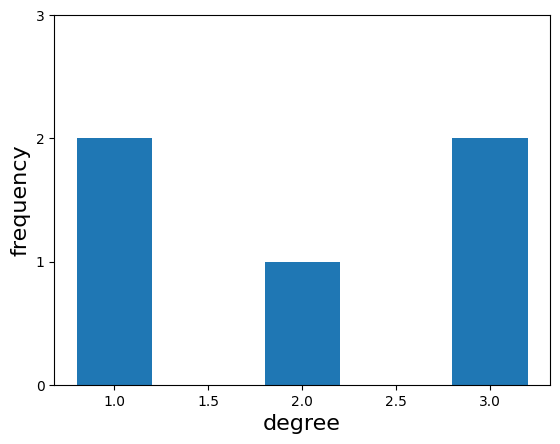

In [18]:
# plot the degree distribution as a bar plot

plt.bar(dict_k_frequency.keys(), dict_k_frequency.values(),width=.4)
plt.xlabel('degree',fontsize = 16)
plt.ylabel('frequency',fontsize = 16)
plt.ylim(0,3)
plt.yticks(list(range(4)))
plt.show()